# Correlation between title as question and popularity

##### (I just copied the popularity part from Thizirie)

In [125]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
import ast
from sklearn import preprocessing

In [126]:
df = pd.read_csv("Project/TED/ted_main.csv")

In [127]:
df['comm_sc'] = ( df['comments'] - df['comments'].min() ) / ( df['comments'].max() - df['comments'].min() )
df['views_sc'] = ( df['views'] - df['views'].min() ) / ( df['views'].max() - df['views'].min() )
df['ratings'] = df['ratings'].apply(lambda x: ast.literal_eval(x))

In [128]:
df['ratings_count'] = 0

for i in range(2550):
    cnt = 0
    for rev in range(0, 14):
        cnt = cnt + df['ratings'][i][rev].get('count')
    df.loc[(i, 'ratings_count')] = cnt

In [129]:
df['ratings_nbr_sc'] = ( df['ratings_count'] - df['ratings_count'].min() ) / ( df['ratings_count'].max() - df['ratings_count'].min() )

In [130]:
df['popularity'] = ( df['views_sc'] + df['comm_sc'] + df['ratings_nbr_sc']) / 3

In [131]:
df.head(6)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,speaker_occupation,tags,title,url,views,comm_sc,views_sc,ratings_count,ratings_nbr_sc,popularity
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.710872,1.000000,93850,1.000000,0.903624
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.041081,0.066772,2936,0.030582,0.046145
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.019057,0.033615,2824,0.029387,0.027353
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,...,Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,0.030928,0.034914,3728,0.039027,0.034956
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,0.092315,0.253418,25620,0.272462,0.206065
5,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,1138838400,36,Tony Robbins,Tony Robbins: Why we do what we do,1,1151440680,...,Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401,0.104655,0.437398,15356,0.163016,0.235023


### Let's start from this point: <br>
Let's create a column to see is the title is or not a question.

In [136]:
#df['question'] = df['title'].str.contains("\?") 
df['question']=0
for i in range (0,len(df)):
    if (("?") in df.loc[(i,'title')]):
        df.loc[(i,'question')] = 1
    else:
        df.loc[(i,'question')] = 0
df.head() 

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,tags,title,url,views,comm_sc,views_sc,ratings_count,ratings_nbr_sc,popularity,question
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.710872,1.000000,93850,1.000000,0.903624,1
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.041081,0.066772,2936,0.030582,0.046145,0
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.019057,0.033615,2824,0.029387,0.027353,0
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,...,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,0.030928,0.034914,3728,0.039027,0.034956,0
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,0.092315,0.253418,25620,0.272462,0.206065,0


In [137]:
df['question'].corr(df['popularity'])

0.04232748160695268

In [140]:
df['question'].value_counts()

0    2342
1     208
Name: question, dtype: int64

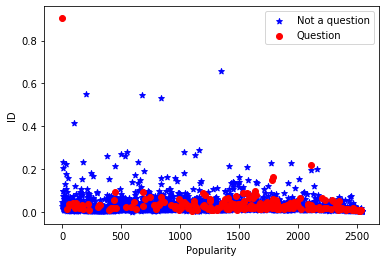

In [151]:
#add id column
df['id']=df.index
#show scatter plot

#df.plot.scatter(x = 'id', y = 'popularity')

plt.scatter(df[df['question'] == 0]['id'],df[df['question'] == 0]['popularity'], color='b', marker='*', label='Not a question')
plt.scatter(df[df['question'] == 1]['id'],df[df['question'] == 1]['popularity'], color='r',label='Question')
plt.xlabel('ID')
plt.ylabel('Popularity')
plt.legend()
plt.show()

Both from the correlation function and the scatterplot, we can see that there isn't correlation between the question title and the popularity of the video.